<a href="https://colab.research.google.com/github/mauricioaalmeida/ONE-ML/blob/main/ONE_Classificacao_Marketing_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação: Primeiros passos

Neste projeto, iremos analisar dados de uma campanha de marketing para aderência de investimentos. O intuito é usar as informações dos dados para prever se os clientes de um banco vão aplicar o dinheiro em um investimento ou não.

Essa previsão será feita utilizando machine learning e este notebook vai conter os passos para se obter um modelo capaz de realizar as previsões, desde a **leitura**, **análise exploratória**, **separação** e **transformação** dos dados, até o **ajuste**, **avaliação** e **comparação** de modelos de classificação.

### Importação das bibliotecas

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Análise exploratória

## Fazendo a leitura dos dados

Podemos realizar a leitura dos dados a partir da biblioteca `pandas`. Por conta disso, vamos realizar a importação da biblioteca com o comando `import pandas as pd`.

Como o arquivo de dados está no formato *csv*, vamos realizar a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [ ]:
url = 'https://raw.githubusercontent.com/mauricioaalmeida/ONE-ML/refs/heads/main/data/marketing_investimento.csv'

In [ ]:
dados = pd.read_csv(url)
dados.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


In [ ]:
dados.describe()

,idade,saldo,tempo_ult_contato,numero_contatos
count,1268.000000,1268.000000,1268.000000,1268.000000
mean,41.376972,1443.426656,367.574921,2.715300
std,11.383805,2690.406767,347.969723,2.885642
min,19.000000,-1206.000000,5.000000,1.000000
25%,33.000000,91.250000,134.000000,1.000000
50%,39.000000,491.500000,251.000000,2.000000
75%,49.000000,1623.500000,488.250000,3.000000
max,87.000000,27069.000000,3025.000000,32.000000


Para criar modelos de classificação, precisamos utilizar dados de qualidade, sem inconsistências e sem dados faltantes. Vamos checar se existem dados nulos e o tipo dos dados de cada coluna na base de dados a partir do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


### Explorando Variáveis Categóricas

In [ ]:
dados.estado_civil.value_counts()

,count
estado_civil,
casado (a),738
solteiro (a),368
divorciado (a),162


In [ ]:
dados.escolaridade.value_counts()

,count
escolaridade,
medio,662
superior,413
fundamental,193


In [ ]:
dados.inadimplencia.value_counts()

,count
inadimplencia,
nao,1245
sim,23


In [ ]:
dados.fez_emprestimo.value_counts()

,count
fez_emprestimo,
nao,1098
sim,170


In [ ]:
dados.aderencia_investimento.value_counts()

,count
aderencia_investimento,
nao,766
sim,502


In [ ]:
px.histogram(dados, x='aderencia_investimento')


In [ ]:
px.histogram(dados, x='estado_civil', color='aderencia_investimento',barmode='group')
#

In [ ]:
px.histogram(dados, x='escolaridade', color='aderencia_investimento',barmode='group')

In [ ]:
px.histogram(dados, x='inadimplencia', color='aderencia_investimento',barmode='group')

In [ ]:
px.histogram(dados, x='fez_emprestimo', color='aderencia_investimento',barmode='group')

## Variáveis numéricas

In [ ]:
px.box(dados, x='idade', color='aderencia_investimento')

In [ ]:
px.box(dados, x='saldo', color='aderencia_investimento')

In [ ]:
px.box(dados, x='tempo_ult_contato', color='aderencia_investimento')

In [ ]:
px.box(dados, x='numero_contatos', color='aderencia_investimento')

In [55]:
colunas = dados.columns.tolist()
col_categoricas = dados.select_dtypes(include=['object']).columns.tolist()
col_numericas = dados.select_dtypes(include=['number']).columns.tolist()
col_alvo='aderencia_investimento'
colunas.remove(col_alvo)
colunas

['idade',
 'estado_civil',
 'escolaridade',
 'inadimplencia',
 'saldo',
 'fez_emprestimo',
 'tempo_ult_contato',
 'numero_contatos']

In [29]:
print (col_categoricas)
print (col_numericas)

['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo', 'aderencia_investimento']
['idade', 'saldo', 'tempo_ult_contato', 'numero_contatos']


## Separando os dados
(variáveis explicativas e variáveis alvo)

In [26]:
x = dados.drop(col_alvo, axis=1)
y = dados[col_alvo]

In [27]:
x.head()


,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,nao,242,nao,587,1
1,42,casado (a),medio,nao,1289,nao,250,4
2,23,solteiro (a),superior,nao,363,nao,16,18
3,58,divorciado (a),superior,nao,1382,nao,700,1
4,50,casado (a),medio,nao,3357,nao,239,4


In [28]:
y.head()

,aderencia_investimento
0,sim
1,sim
2,nao
3,sim
4,sim


## Transformação dos dados

In [32]:
print (col_categoricas)
print (col_numericas)

['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo', 'aderencia_investimento']
['idade', 'saldo', 'tempo_ult_contato', 'numero_contatos']


In [33]:
colunas = x.columns
one_hot = make_column_transformer((
    OneHotEncoder( drop = 'if_binary'), #sparse=False, handle_unknown='ignore',
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']
),
    remainder='passthrough',
    sparse_threshold=0)


In [34]:
x = one_hot.fit_transform(x)

In [35]:
one_hot.get_feature_names_out()

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [36]:
pd.DataFrame(x, columns=one_hot.get_feature_names_out())

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


Tratar a variável alvo


In [38]:
label_encoder = LabelEncoder()


In [39]:
y = label_encoder.fit_transform(y)

In [40]:
y


array([1, 1, 0, ..., 1, 1, 1])

## Separação de treino e teste

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=5)


## Usando um modelo Dummy para ter uma linha de base

In [47]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train, y_train)

dummy.score(x_test, y_test)

0.6025236593059937

# Arvore de decisão

In [50]:
tree = DecisionTreeClassifier(random_state=5)
tree.fit(x_train, y_train)

tree.score(x_test, y_test)

0.6656151419558359

In [51]:
tree.predict(x_test)


array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [59]:
x_cols = ['casado (a)',
       'divorciado (a)',
       'solteiro (a)',
       'fundamental',
       'medio',
       'superior',
       'inadimplencia',
       'fez_emprestimo_sim', 'idade',
       'saldo', 'tempo_ult_contato',
       'numero_contatos']


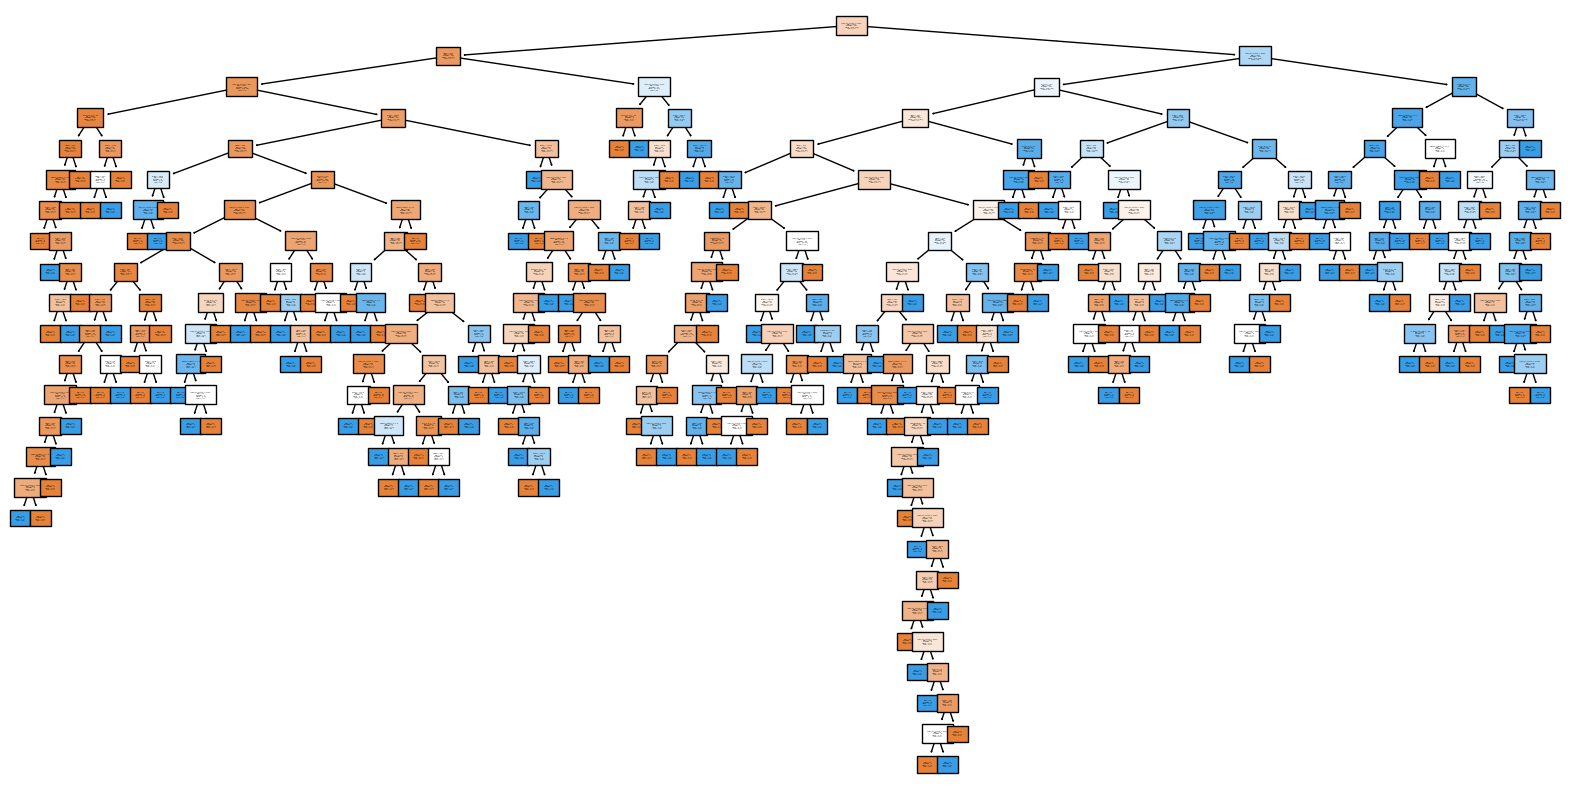

In [63]:
plt.figure(figsize=(20,10))
plot_tree(tree, class_names= ['nao', 'sim'], feature_names=x_cols, filled=True, fontsize=1)
plt.show()

In [64]:
tree.score(x_train, y_train)

1.0

para evitar overfitting vamos refazer limitando os niveis

In [69]:
tree = DecisionTreeClassifier(max_depth=3, random_state=5)
tree.fit(x_train, y_train)

tree.score(x_test, y_test)

0.7160883280757098

In [66]:
tree.score(x_train, y_train)


0.7613038906414301

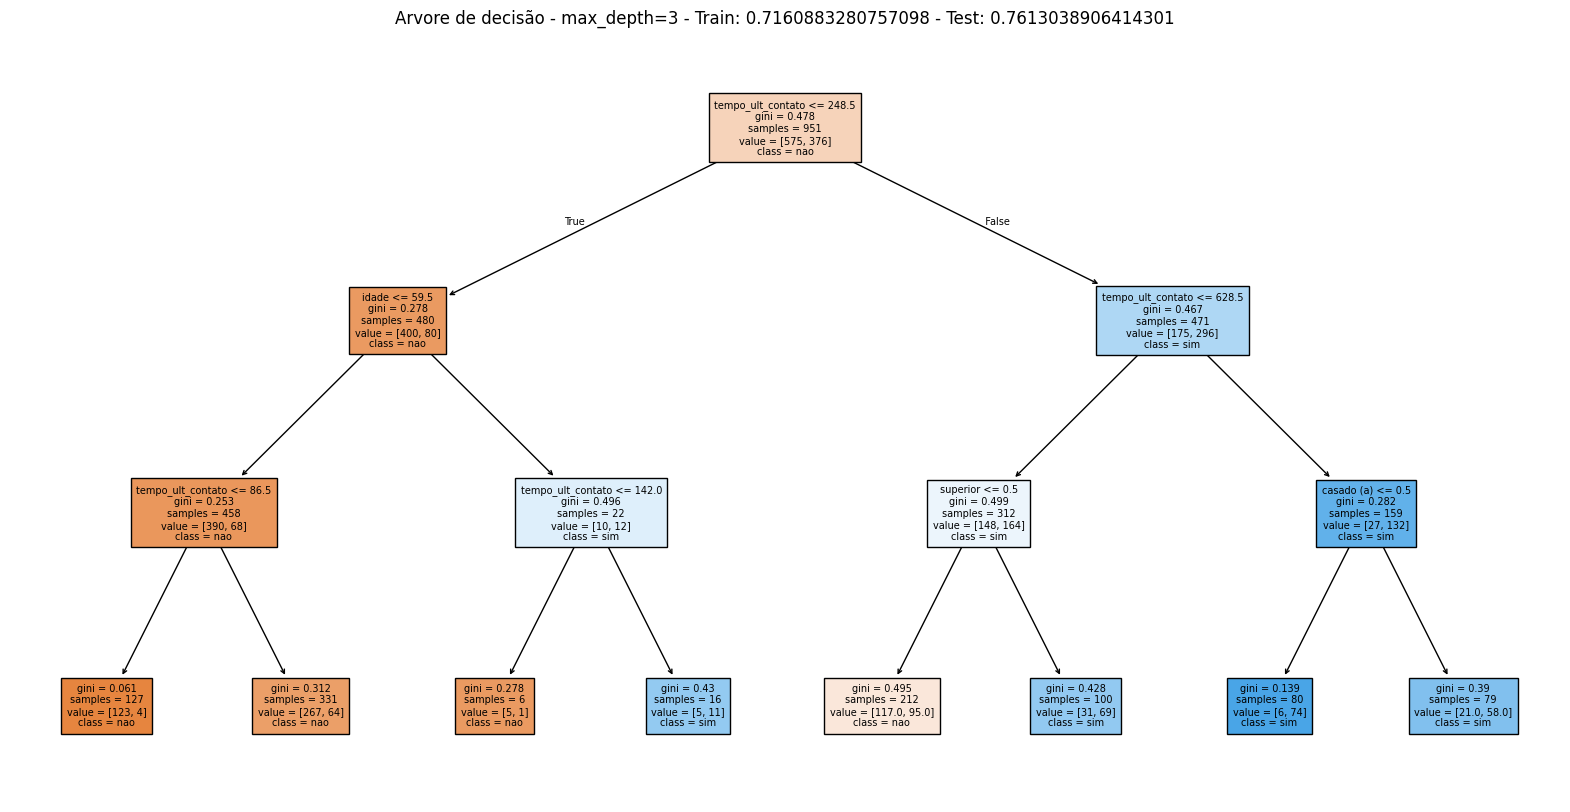

In [70]:
plt.figure(figsize=(20,10))
plot_tree(tree, class_names= ['nao', 'sim'], feature_names=x_cols, filled=True, fontsize=7)
plt.title(f'Arvore de decisão - max_depth={tree.get_depth()} - Train: {tree.score(x_test, y_test)} - Test: {tree.score(x_train, y_train)}')
plt.show()

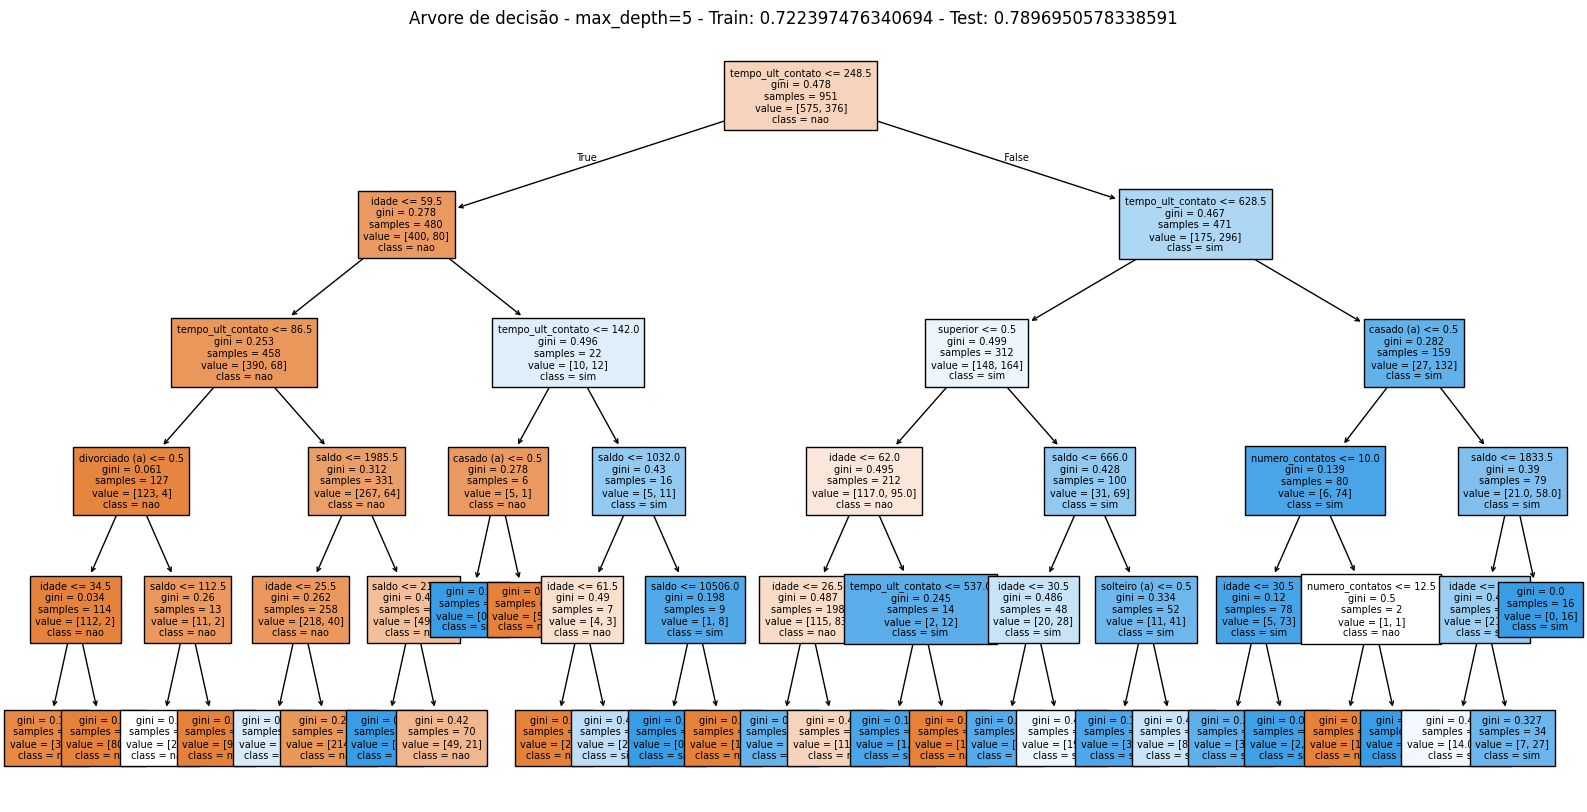

In [68]:
tree = DecisionTreeClassifier(max_depth=5, random_state=5)
tree.fit(x_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(tree, class_names= ['nao', 'sim'], feature_names=x_cols, filled=True, fontsize=7)
plt.title(f'Arvore de decisão - max_depth={tree.get_depth()} - Train: {tree.score(x_test, y_test)} - Test: {tree.score(x_train, y_train)}')
plt.show()
